In [77]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
quandl.ApiConfig.api_key = "iZrFEohVJnsuQei5wy7D"
tc = quandl.get('BSE/BOM539871',paginate=True)

In [125]:
tc.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2020-02-07,619.95,619.95,604.75,605.85,609.29,3460.0,515.0,2108132.0,1914.0,55.32,15.20,-14.10
2020-02-10,611.00,611.00,581.15,598.55,595.24,3422.0,427.0,2036923.0,1769.0,51.69,29.85,-12.45
2020-02-11,605.80,637.00,594.00,609.40,621.05,19547.0,1663.0,12139567.0,7804.0,39.92,43.00,3.60
2020-02-12,613.50,625.50,610.20,617.30,617.72,3955.0,1124.0,2443090.0,2075.0,52.47,15.30,3.80
2020-02-13,618.85,621.65,598.95,602.95,605.27,6745.0,1267.0,4082541.0,4694.0,69.59,22.70,-15.90


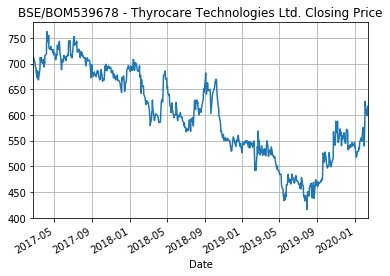

In [126]:
#Plotting of Closing Price of Thyrocare Technology Ltd.

tc['Close'].plot(grid=True)
plt.title("BSE/BOM539678 - Thyrocare Technologies Ltd. Closing Price")
plt.show()

In [127]:
#Creating Trading Signals(tr_signals)
#defining short-window(sw) and long-window(lw)
sw = 50
lw = 100

tr_signals = pd.DataFrame(index=tc.index)
tr_signals['tr_signal']=0.0

#short-term moving average
tr_signals['sm_avg'] = tc['Close'].rolling(window=sw, min_periods=1,center=False).mean()

#long-term moving average
tr_signals['lm_avg'] = tc['Close'].rolling(window=lw, min_periods=1,center=False).mean()

tr_signals['tr_signal'][sw:]=np.where(tr_signals['sm_avg'][sw:] > tr_signals['sm_avg'][sw:], 1.0,0.0)
tr_signals['positions'] = tr_signals['tr_signal'].diff()

print(tr_signals)

            tr_signal      sm_avg      lm_avg  positions
Date                                                    
2017-02-21        0.0  710.700000  710.700000        NaN
2017-02-22        0.0  711.275000  711.275000        0.0
2017-02-23        0.0  710.666667  710.666667        0.0
2017-02-27        0.0  708.500000  708.500000        0.0
2017-02-28        0.0  706.210000  706.210000        0.0
...               ...         ...         ...        ...
2020-02-07        0.0  551.541000  543.174000        0.0
2020-02-10        0.0  552.622000  544.416500        0.0
2020-02-11        0.0  553.860000  545.770000        0.0
2020-02-12        0.0  554.859000  547.016500        0.0
2020-02-13        0.0  555.493000  547.787000        0.0

[737 rows x 4 columns]


[]

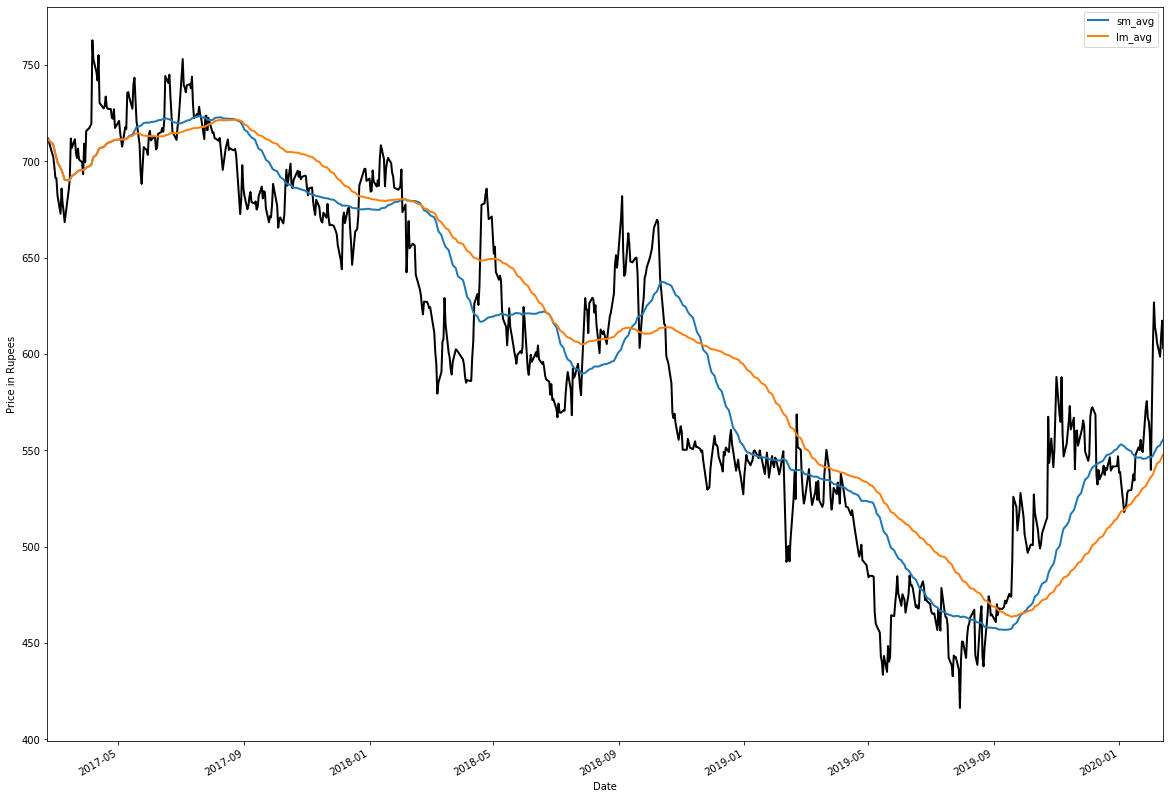

In [128]:
fig = plt.figure(figsize=(20,15))
axl = fig.add_subplot(111, ylabel="Price in Rupees")

tc['Close'].plot(ax=axl, color='black', lw=2.0)
tr_signals[['sm_avg','lm_avg']].plot(ax=axl,lw=2.0)

axl.plot(signals.loc[signals.positions == 1.0].index,tr_signals.sm_avg[signals.positions == 1.0])
axl.plot(signals.loc[signals.positions == -1.0].index,tr_signals.sm_avg[signals.positions == -1.0])

plt.plot()